## ***Food and Beverages Market Analysis*** ##

### ***Part 1 : Identify the top 10 emerging F&B flavors over the last 5 years in North America*** ###

In [118]:
import pandas as pd
import datetime
from collections import Counter, defaultdict
from fuzzywuzzy import fuzz

In [355]:
prod_launch_df = pd.read_excel("Product Launch Dataset.xlsm")

In [130]:
flav_class_df = pd.read_excel("Flavor Classification Dataset.xlsm")

In [131]:
positioning_cat_map_df= pd.read_excel("Positioning Category Mapping Dataset.xlsm")

In [120]:
prod_launch_df

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,2001-01-01,WE1,West Europe,"Low Calorie, Natural"
1,2,"Fruit, not specified",Carbonates,2001-01-01,WE2,West Europe,Convenience - Consumption
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu..."
3,4,Mango; Passion Fruit,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu..."
4,5,Mango,Juice & Juice Drinks,2001-01-01,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu..."
...,...,...,...,...,...,...,...
114684,114685,"Berry, Wildberry",Other Soft Drinks,2010-01-01,NA1,North America,"Low Calorie, Energy/Alertness, Ethical - Packa..."
114685,114686,"Raspberry, Not Specified",Other Soft Drinks,2010-01-01,NA1,North America,"Low Calorie, Energy/Alertness, Ethical - Packa..."
114686,114687,"Tea, White",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."
114687,114688,"Tea, Green; Citrus, Not Specified",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."


In [121]:
prod_launch_df.shape

(114689, 7)

In [122]:
prod_launch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114689 entries, 0 to 114688
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Product id          114689 non-null  int64         
 1   Flavor              112713 non-null  object        
 2   Market Subcategory  114689 non-null  object        
 3   Launch Date         114689 non-null  datetime64[ns]
 4   Country             114689 non-null  object        
 5   Region              114689 non-null  object        
 6   Positioning         110377 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.1+ MB


In [123]:
# Filter the dataframe to include only rows where the 'Region' is 'North America'
north_america_df = prod_launch_df[prod_launch_df['Region'] == 'North America']

In [124]:
north_america_df

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
6,7,"Fruit, not specified",Drink Concentrates & Mixes,2001-01-01,NA1,North America,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb"
8,9,"Cherry, Not specified; Vanilla, Not specified",Bottled Water - Flavoured,2001-01-01,NA1,North America,Convenience - Packaging
9,10,"Orange, not specified",Juice & Juice Drinks,2001-01-01,NA1,North America,"Low Calorie, Low Sugar"
10,11,"Superfruit, Pomegranate; Berry, Blackberry",Carbonates,2001-01-01,NA1,North America,"Female, Antioxidant, Low Calorie, Low Carb, Su..."
14,15,"Superfruit, acai; Herbs, not specified",Juice & Juice Drinks,2001-01-01,NA2,North America,"Heart Health, Antioxidant, Anti-Aging/Aging-We..."
...,...,...,...,...,...,...,...
114684,114685,"Berry, Wildberry",Other Soft Drinks,2010-01-01,NA1,North America,"Low Calorie, Energy/Alertness, Ethical - Packa..."
114685,114686,"Raspberry, Not Specified",Other Soft Drinks,2010-01-01,NA1,North America,"Low Calorie, Energy/Alertness, Ethical - Packa..."
114686,114687,"Tea, White",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."
114687,114688,"Tea, Green; Citrus, Not Specified",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."


In [317]:
# Market Overview
# Calculate the count of unique subcategories
subcategory_counts = north_america_df['Market Subcategory'].value_counts().reset_index()
subcategory_counts.columns = ['Subcategory Name', 'Count']

# Display the DataFrame
print(subcategory_counts)
subcategory_counts.to_excel('Market Overview.xlsx',index=False)

               Subcategory Name  Count
0          Juice & Juice Drinks   6816
1    Drink Concentrates & Mixes   3229
2                      Iced Tea   2145
3                    Carbonates   2024
4                 Energy Drinks   1937
5     Bottled Water - Flavoured   1833
6             Sports Drinks RTD    612
7   Bottled Water - Unflavoured    534
8                   Iced Coffee    488
9             Other Soft Drinks    380
10               Sports Powders     81
11                Sports Others      4
12           Sports Supplements      2


In [125]:
# Remove rows with null values in the 'Flavor' column
north_america_df_clean = north_america_df.dropna(subset=['Flavor'])

In [219]:
# Filter the cleaned North America dataframe for the last 5 years available in the dataset (up to 2010)
last_year_in_dataset = north_america_df_clean['Launch Date Date'].dt.year.max()
five_years_prior = last_year_in_dataset - 6

recent_df = north_america_df_clean[north_america_df_clean['Launch Date Date'].dt.year > five_years_prior]

In [220]:
import pandas as pd
import re

# Function to clean the Flavor column by removing 'Not specified' and variations (case-insensitive) and replace semicolons with commas
def clean_flavor(flavor_string):
    if isinstance(flavor_string, str):
        # Remove 'Not specified' and variations (case-insensitive)
        cleaned_flavor = re.sub(r'(?i)\bNot specified\b', '', flavor_string)
        # Replace semicolons with commas
        cleaned_flavor = cleaned_flavor.replace(';', ',')
        return cleaned_flavor.strip(',').strip()  # Remove trailing commas and extra spaces
    return flavor_string

# Apply the clean_flavor function to the Flavor column using .loc to avoid the warning
recent_df.loc[:, 'Flavor'] = recent_df['Flavor'].apply(clean_flavor)

# Display the DataFrame with cleaned Flavor column
recent_df

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
26771,26772,"Ginger Beer, Rum,",Carbonates,2008-01-01,NA3,North America,"Traditional, Natural, Convenience - Consumption"
28419,28420,Lemonade,Drink Concentrates & Mixes,2005-01-01,NA2,North America,"Dry, Sticks, Natural, Ethical - Human"
28618,28619,Unflavored,Energy Drinks,2005-01-01,NA2,North America,"Convenience - Consumption, Energy/Alertness, O..."
28619,28620,"Apple, green, Kiwi, Banana",Juice & Juice Drinks,2005-01-01,NA2,North America,"Juice Drinks (up to 25% juice), No Added Sugar..."
28622,28623,Unflavored,Bottled Water - Unflavoured,2005-01-01,NA2,North America,NaN
...,...,...,...,...,...,...,...
114684,114685,"Berry, Wildberry",Other Soft Drinks,2010-01-01,NA1,North America,"Low Calorie, Energy/Alertness, Ethical - Packa..."
114685,114686,"Raspberry,",Other Soft Drinks,2010-01-01,NA1,North America,"Low Calorie, Energy/Alertness, Ethical - Packa..."
114686,114687,"Tea, White",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."
114687,114688,"Tea, Green, Citrus,",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."


In [214]:
# # Assuming 'flav_class_df' has the columns 'Flavor' and 'Flavor_Group'

# # Merge the two DataFrames based on the 'Flavor' column
# merged_df = recent_df.merge(flav_class_df, on='Flavor', how='left')

# # Display the resulting DataFrame with 'Flavor_Group' added
# merged_df

In [139]:
# import pandas as pd
# from fuzzywuzzy import fuzz

# # Function to find the best matching flavor group based on a threshold
# def find_matching_group(flavor, threshold=50):
#     best_match = None
#     best_score = 0
#     for _, row in flav_class_df.iterrows():
#         score = fuzz.token_sort_ratio(flavor, row['Flavor'])
#         if score > best_score and score >= threshold:
#             best_score = score
#             best_match = row['Flavor_Group']
#     return best_match

# # Apply the find_matching_group function to assign Flavor_Group to recent_df
# ['Flavor_Group'] = merged_df['Flavor'].apply(find_matching_group)

# # Display the DataFrame with Flavor_Group assigned
# merged_df

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor_Group
0,26772,"Ginger Beer, Rum,",Carbonates,2008-01-01,NA3,North America,"Traditional, Natural, Convenience - Consumption",Alcohol
1,34656,"Berry,",Juice & Juice Drinks,2006-01-01,NA2,North America,"100% Not from Concentrate, No Additives/Preser...",Alcohol
2,34658,"Mango, Banana, Coconut",Juice & Juice Drinks,2006-01-01,NA2,North America,"100% Not from Concentrate, No Additives/Preser...",Vegetable
3,34690,"Tea, black, Guarana, Ginseng,",Energy Drinks,2006-01-01,NA2,North America,"Brain Health, Energy/Alertness, Convenience - ...",Oil & Vinegar
4,34735,"Strawberry, Kiwi",Juice & Juice Drinks,2006-01-01,NA2,North America,"100% Reconstituted, No Added Sugar, Heart Health",Fruit
...,...,...,...,...,...,...,...,...
11554,114685,"Berry, Wildberry",Other Soft Drinks,2010-01-01,NA1,North America,"Low Calorie, Energy/Alertness, Ethical - Packa...",Fruit
11555,114686,"Raspberry,",Other Soft Drinks,2010-01-01,NA1,North America,"Low Calorie, Energy/Alertness, Ethical - Packa...",Fruit
11556,114687,"Tea, White",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con...",Tea
11557,114688,"Tea, Green, Citrus,",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con...",Tea


In [221]:
# Count how many rows have 'None' in the 'Flavor_Group' column
none_count = recent_df['Flavor'].isna().sum()

# Print the count
print("Number of rows with 'None' in Flavor_Group:", none_count)

Number of rows with 'None' in Flavor_Group: 0


In [222]:
recent_df.to_excel('test.xlsx',index=False)

In [223]:
recent_df2 = recent_df

In [224]:
# Remove the trailing comma in the "Flavor" column using .loc
recent_df2.loc[:, 'Flavor'] = recent_df2['Flavor'].str.rstrip(',')

# Display the DataFrame with the trailing commas removed
recent_df2

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
26771,26772,"Ginger Beer, Rum",Carbonates,2008-01-01,NA3,North America,"Traditional, Natural, Convenience - Consumption"
28419,28420,Lemonade,Drink Concentrates & Mixes,2005-01-01,NA2,North America,"Dry, Sticks, Natural, Ethical - Human"
28618,28619,Unflavored,Energy Drinks,2005-01-01,NA2,North America,"Convenience - Consumption, Energy/Alertness, O..."
28619,28620,"Apple, green, Kiwi, Banana",Juice & Juice Drinks,2005-01-01,NA2,North America,"Juice Drinks (up to 25% juice), No Added Sugar..."
28622,28623,Unflavored,Bottled Water - Unflavoured,2005-01-01,NA2,North America,NaN
...,...,...,...,...,...,...,...
114684,114685,"Berry, Wildberry",Other Soft Drinks,2010-01-01,NA1,North America,"Low Calorie, Energy/Alertness, Ethical - Packa..."
114685,114686,Raspberry,Other Soft Drinks,2010-01-01,NA1,North America,"Low Calorie, Energy/Alertness, Ethical - Packa..."
114686,114687,"Tea, White",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."
114687,114688,"Tea, Green, Citrus",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."


In [225]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


# Create a TF-IDF vectorizer to convert text into numerical features
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Flavor' column from recent_df
recent_tfidf = tfidf_vectorizer.fit_transform(recent_df2['Flavor'])

# Transform the 'Flavor' column from flav_class_df
flav_class_tfidf = tfidf_vectorizer.transform(flav_class_df['Flavor'])

# Calculate the cosine similarity between recent_df and flav_class_df
cosine_similarities = linear_kernel(recent_tfidf, flav_class_tfidf)

# Assign Flavor_Group based on the highest similarity score
def map_flavor_group(similarity_scores):
    max_index = similarity_scores.argmax()
    return flav_class_df.iloc[max_index]['Flavor_Group']

# Assign Flavor_Group based on the highest similarity score using .loc
recent_df.loc[:, 'Flavor_Group'] = [map_flavor_group(similarities) for similarities in cosine_similarities]

# Display the DataFrame with 'Flavor_Group' assigned
recent_df2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16428\1362411465.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df.loc[:, 'Flavor_Group'] = [map_flavor_group(similarities) for similarities in cosine_similarities]


,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning,Flavor_Group
26771,26772,"Ginger Beer, Rum",Carbonates,2008-01-01,NA3,North America,"Traditional, Natural, Convenience - Consumption",Alcohol
28419,28420,Lemonade,Drink Concentrates & Mixes,2005-01-01,NA2,North America,"Dry, Sticks, Natural, Ethical - Human",Fruit
28618,28619,Unflavored,Energy Drinks,2005-01-01,NA2,North America,"Convenience - Consumption, Energy/Alertness, O...",Unflavored
28619,28620,"Apple, green, Kiwi, Banana",Juice & Juice Drinks,2005-01-01,NA2,North America,"Juice Drinks (up to 25% juice), No Added Sugar...",Fruit
28622,28623,Unflavored,Bottled Water - Unflavoured,2005-01-01,NA2,North America,NaN,Unflavored
...,...,...,...,...,...,...,...,...
114684,114685,"Berry, Wildberry",Other Soft Drinks,2010-01-01,NA1,North America,"Low Calorie, Energy/Alertness, Ethical - Packa...",Fruit
114685,114686,Raspberry,Other Soft Drinks,2010-01-01,NA1,North America,"Low Calorie, Energy/Alertness, Ethical - Packa...",Alcohol
114686,114687,"Tea, White",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con...",Tea
114687,114688,"Tea, Green, Citrus",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con...",Fruit


In [226]:
# Count how many rows have 'None' in the 'Flavor_Group' column
none_count = recent_df2['Flavor_Group'].isna().sum()

# Print the count
print("Number of rows with 'None' in Flavor_Group:", none_count)

Number of rows with 'None' in Flavor_Group: 0


In [268]:
# Replace "Apple, Red" and "Apple, red" with "Apple, Red" in the Flavor column of recent_df2
recent_df2['Flavor'] = recent_df2['Flavor'].str.replace('Apple, red', 'Apple, Red', case=False)

# Display the updated recent_df2 DataFrame
print(recent_df2)

        Product id                      Flavor           Market Subcategory  \
26771        26772            Ginger Beer, Rum                   Carbonates   
28419        28420                    Lemonade   Drink Concentrates & Mixes   
28618        28619                  Unflavored                Energy Drinks   
28619        28620  Apple, green, Kiwi, Banana         Juice & Juice Drinks   
28622        28623                  Unflavored  Bottled Water - Unflavoured   
...            ...                         ...                          ...   
114684      114685            Berry, Wildberry            Other Soft Drinks   
114685      114686                   Raspberry            Other Soft Drinks   
114686      114687                  Tea, White                     Iced Tea   
114687      114688          Tea, Green, Citrus                     Iced Tea   
114688      114689                      Cherry                Energy Drinks   

       Launch Date Country         Region  \
26771 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16428\3693454063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df2['Flavor'] = recent_df2['Flavor'].str.replace('Apple, red', 'Apple, Red', case=False)


In [309]:
# Convert the 'Launch Date Date' column to datetime and extract the year
recent_df2['Year'] = pd.to_datetime(recent_df2['Launch Date Date']).dt.year

# Filter the DataFrame to include only data from 2006 onwards
filtered_df = recent_df2[recent_df2['Year'] >= 2006]

# Group the filtered DataFrame by Year and Flavor_Group, then count the occurrences
flavor_group_counts_yearwise = filtered_df.groupby(['Year', 'Flavor_Group']).size().reset_index(name='Count')

# Display the DataFrame with Flavor_Group and their counts year-wise from 2006 onwards
print("Year-wise Flavor_Group Counts from 2006 onwards:")
print(flavor_group_counts_yearwise)


Year-wise Flavor_Group Counts from 2006 onwards:
    Year        Flavor_Group  Count
0   2006             Alcohol    117
1   2006       Brown Flavors    220
2   2006  Cake, cookie & pie     27
3   2006       Dairy Flavors     15
4   2006              Ethnic      9
..   ...                 ...    ...
92  2010      Spices & Seeds    102
93  2010                 Tea    181
94  2010          Unflavored    129
95  2010             Vanilla     30
96  2010           Vegetable    180

[97 rows x 3 columns]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16428\2360610924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df2['Year'] = pd.to_datetime(recent_df2['Launch Date']).dt.year


In [311]:
flavor_group_counts_yearwise.to_excel("Flavor Group categories - New F&B product Launch Datees across the world.xlsx",index=False)

In [319]:
# Get the top 10 unique values and their counts
top_10_positioning_values = recent_df2['Positioning'].value_counts().head(10)

# Create a DataFrame to display the results
top_10_positioning_df = pd.DataFrame({'Positioning': top_10_positioning_values.index, 'Count': top_10_positioning_values.values})

# Display the top 10 positioning values and their counts
top_10_positioning_df.to_excel('Top 10 Positioning - All Categories.xlsx',index=False)

In [320]:
top_10_positioning_df

,Positioning,Count
0,Convenience - Consumption,416
1,Convenience - Easy-to-Prepare,316
2,"Energy/Alertness, Convenience - Consumption",165
3,Juice Drinks (up to 25% juice),115
4,Convenience - Packaging,108
5,"Dry, Convenience - Easy-to-Prepare",100
6,100% Reconstituted,92
7,"Natural, Convenience - Consumption",81
8,"Indulgent and Premium, Convenience - Easy-to-P...",71
9,"Convenience - Easy-to-Prepare, Kosher",62


In [228]:
# # Calculate the frequency of each flavor in the "Flavor" column
# flavor_counts = recent_df2['Flavor'].value_counts()

# # Display the top 15 most occurring flavors
# top_15_flavors = flavor_counts.head(15)
# print(top_15_flavors)

In [269]:
filtered_df = recent_df2.copy()
filtered_df['Flavor'] = filtered_df['Flavor'].replace(similar_flavors_mapping)

# Filter out the "Unflavored" flavor
filtered_df = filtered_df[~filtered_df['Flavor'].str.lower().str.contains('unflavored|grape, red')]

# Convert the "Launch Date Date" column to datetime and extract the year using .loc
filtered_df.loc[:, 'Year'] = pd.to_datetime(filtered_df['Launch Date Date']).dt.year

# Calculate the count of each flavor for each year
flavor_counts = filtered_df.groupby(['Year', 'Flavor']).size().reset_index(name='Count')

# Display the DataFrame with Year, Flavor, and Count columns for all flavors year-wise
print("Year-wise DataFrame for All Flavors:")
flavor_counts

Year-wise DataFrame for All Flavors:


,Year,Flavor,Count
0,2005,Aloe Vera,7
1,2005,"Aloe Vera, Mango",1
2,2005,"Apple, Green, Sugar, Cane",1
3,2005,"Apple, Red",36
4,2005,"Apple, Red, Banana",1
...,...,...,...
5512,2010,"Watermelon, Mint, , Lemonade",1
5513,2010,"Watermelon, Mint, , Lime",1
5514,2010,"Watermelon, Raspberry, Red",1
5515,2010,"Watermelon, Strawberry",2


In [270]:
# Get the top 50 flavors based on count for each year separately
top_50_flavors_yearwise = flavor_counts.groupby('Year').apply(lambda x: x.nlargest(50, 'Count')).reset_index(drop=True)

# Display the DataFrame with Year, Flavor, and Count columns for the top 50 flavors for each year
print("Top 50 Flavors Based on Count for Each Year:")
print(top_50_flavors_yearwise)

Top 50 Flavors Based on Count for Each Year:
     Year                       Flavor  Count
0    2005                       Orange     79
1    2005                     Lemonade     60
2    2005                        Fruit     39
3    2005                   Apple, Red     36
4    2005                        Berry     33
..    ...                          ...    ...
295  2010                      Vanilla     10
296  2010                 Apple, Green      9
297  2010  Berry, Cranberry, Raspberry      9
298  2010                 Tea, , Peach      9
299  2010                     Beetroot      8

[300 rows x 3 columns]


In [296]:
# Calculate the total count for each year
total_counts_yearwise = flavor_counts.groupby('Year')['Count'].sum().reset_index(name='Total_Count_Yearwise')

# Get the top 12 flavors based on count for each year separately
top_12_flavors_yearwise = flavor_counts.groupby('Year').apply(lambda x: x.nlargest(12, 'Count')).reset_index(drop=True)

# Calculate the percentage of the top 12 flavors out of the total flavor count for each year
top_12_flavors_yearwise = top_12_flavors_yearwise.merge(total_counts_yearwise, on='Year')
top_12_flavors_yearwise['Percentage'] = (top_12_flavors_yearwise['Count'] / top_12_flavors_yearwise['Total_Count_Yearwise']) * 100

# Display the DataFrame with Year, Flavor, Count, Total_Count_Yearwise, and Percentage columns
print("Top 12 Flavors Based on Count for Each Year with Percentage:")
top_12_flavors_yearwise

Top 12 Flavors Based on Count for Each Year with Percentage:


,Year,Flavor,Count,Total_Count_Yearwise,Percentage
0,2005,Orange,79,1774,4.453213
1,2005,Lemonade,60,1774,3.382187
2,2005,Fruit,39,1774,2.198422
3,2005,"Apple, Red",36,1774,2.029312
4,2005,Berry,33,1774,1.860203
...,...,...,...,...,...
67,2010,Ginger Ale,32,2677,1.195368
68,2010,Cherry,29,2677,1.083302
69,2010,Grape,27,2677,1.008592
70,2010,Lime,23,2677,0.859171


In [297]:
# Group the top_12_flavors_yearwise DataFrame by 'Year' and calculate the sum of 'Percentage' for each year
yearly_sum_percentage = top_12_flavors_yearwise.groupby('Year')['Percentage'].sum().reset_index(name='Yearly_Sum_Percentage')

# Display the year-wise sum total of the 'Percentage' column
print("Year-wise Sum Total of Percentage:")
print(yearly_sum_percentage)


Year-wise Sum Total of Percentage:
   Year  Yearly_Sum_Percentage
0  2005              21.645998
1  2006              20.384615
2  2007              26.783398
3  2008              21.903153
4  2009              26.345811
5  2010              22.824057


In [298]:
# Sort the top_12_flavors_yearwise DataFrame by 'Year' and 'Flavor'
top_12_flavors_yearwise = top_12_flavors_yearwise.sort_values(['Year', 'Flavor'])

# Calculate the growth rate for each flavor year-wise
top_12_flavors_yearwise['Growth_Rate'] = top_12_flavors_yearwise.groupby('Flavor')['Count'].pct_change() * 100

# Display the DataFrame with the calculated growth rates
print("Top 12 Flavors with Yearly Growth Rates:")
print(top_12_flavors_yearwise)

Top 12 Flavors with Yearly Growth Rates:
    Year      Flavor  Count  Total_Count_Yearwise  Percentage  Growth_Rate
3   2005  Apple, Red     36                  1774    2.029312          NaN
4   2005       Berry     33                  1774    1.860203          NaN
9   2005        Cola     17                  1774    0.958286          NaN
2   2005       Fruit     39                  1774    2.198422          NaN
10  2005       Grape     17                  1774    0.958286          NaN
..   ...         ...    ...                   ...         ...          ...
67  2010  Ginger Ale     32                  2677    1.195368          NaN
69  2010       Grape     27                  2677    1.008592    58.823529
60  2010    Lemonade    124                  2677    4.632051     1.639344
70  2010        Lime     23                  2677    0.859171    35.294118
61  2010      Orange    113                  2677    4.221143   -20.979021

[72 rows x 6 columns]


In [300]:
# Filter the DataFrame for years 2006 to 2010
filtered_df = top_12_flavors_yearwise[(top_12_flavors_yearwise['Year'] >= 2006) & (top_12_flavors_yearwise['Year'] <= 2010)]

# Calculate the average growth rate for each flavor within the 2006-2010 period
average_growth_rates = filtered_df.groupby('Flavor')['Growth_Rate'].mean().reset_index(name='Average_Growth_Rate')

# Identify flavors with positive growth rates for each year in 2006-2010
consistently_growing_flavors = average_growth_rates[
    (average_growth_rates['Average_Growth_Rate'] > 0) &
    (average_growth_rates['Flavor'].isin(filtered_df['Flavor'].unique()))
]

# Sort the consistently growing flavors in descending order of growth rate
consistently_growing_flavors = consistently_growing_flavors.sort_values(by='Average_Growth_Rate', ascending=False)

# Get the top 10 consistently growing flavors
top_10_consistently_growing_flavors = consistently_growing_flavors.head(10)

# Assuming top_10_consistently_growing_flavors is a DataFrame or a list of dictionaries
top_10_consistently_growing_flavors_df = pd.DataFrame(top_10_consistently_growing_flavors)

# Display the DataFrame with the top 10 consistently growing flavors
print("Top 10 Consistently Growing Flavors Sorted by Growth Rate:")
top_10_consistently_growing_flavors_df

Top 10 Consistently Growing Flavors Sorted by Growth Rate:


,Flavor,Average_Growth_Rate
18,Tea,127.777778
2,"Berry, Cranberry",62.777778
10,Grape,58.823529
4,Citrus,33.455882
5,Coconut,33.077191
7,Cola,33.040812
0,"Apple, Red",27.552551
8,Fruit,17.878354
11,Lemonade,17.153247
1,Berry,14.530159


In [302]:
top_10_consistently_growing_flavors_df.to_excel('Average Growth rate of Top 10 Consistently Growing Flavors.xlsx',index=False)

In [285]:
# Filter flavor_counts_df to include only the top 10 flavors
filtered_flavor_counts = flavor_counts[flavor_counts['Flavor'].isin(top_10_consistently_growing_flavors)]

# Create a year-wise DataFrame for the top 10 consistently growing flavors
yearly_counts_top_10_flavors = filtered_flavor_counts.pivot_table(
    index='Year',
    columns='Flavor',
    values='Count',
    fill_value=0
).reset_index()

# Display the year-wise DataFrame for the top 10 consistently growing flavors
print("Year-wise Counts for the Top 10 Consistently Growing Flavors:")
yearly_counts_top_10_flavors

Year-wise Counts for the Top 10 Consistently Growing Flavors:


Flavor,Year,"Apple, Red",Berry,"Berry, Cranberry",Citrus,Coconut,Cola,Fruit,Grape,Lemonade,Tea
0,2005,36.0,33.0,16.0,13.0,6.0,17.0,39.0,17.0,60.0,11.0
1,2006,29.0,31.0,15.0,16.0,21.0,34.0,42.0,5.0,62.0,10.0
2,2007,33.0,29.0,18.0,16.0,17.0,37.0,47.0,1.0,68.0,10.0
3,2008,26.0,17.0,13.0,17.0,27.0,45.0,30.0,7.0,78.0,18.0
4,2009,71.0,41.0,37.0,33.0,62.0,53.0,76.0,10.0,122.0,41.0
5,2010,65.0,35.0,21.0,19.0,39.0,62.0,40.0,27.0,124.0,17.0


In [291]:
# Filter the year-wise counts for the specified years (2006 to 2010)
yearly_counts_2006_to_2010 = yearly_counts_top_10_flavors[
    (yearly_counts_top_10_flavors['Year'] >= 2006) & (yearly_counts_top_10_flavors['Year'] <= 2010)
]

# Display the year-wise counts for the top 10 consistently growing flavors from 2006 to 2010
print("Year-wise Counts for the Top 10 Consistently Growing Flavors (2006-2010):")
yearly_counts_2006_to_2010

Year-wise Counts for the Top 10 Consistently Growing Flavors (2006-2010):


Flavor,Year,"Apple, Red",Berry,"Berry, Cranberry",Citrus,Coconut,Cola,Fruit,Grape,Lemonade,Tea
1,2006,29.0,31.0,15.0,16.0,21.0,34.0,42.0,5.0,62.0,10.0
2,2007,33.0,29.0,18.0,16.0,17.0,37.0,47.0,1.0,68.0,10.0
3,2008,26.0,17.0,13.0,17.0,27.0,45.0,30.0,7.0,78.0,18.0
4,2009,71.0,41.0,37.0,33.0,62.0,53.0,76.0,10.0,122.0,41.0
5,2010,65.0,35.0,21.0,19.0,39.0,62.0,40.0,27.0,124.0,17.0


In [303]:
# Melting the DataFrame to long format
melted_yearly_counts_top_10_flavors = yearly_counts_2006_to_2010.melt(id_vars='Year', var_name='Flavor', value_name='Count')

# Display the long format DataFrame for the top 10 consistently growing flavors
print("Year-wise Counts for the Top 10 Consistently Growing Flavors (Long Format):")
print(melted_yearly_counts_top_10_flavors)

Year-wise Counts for the Top 10 Consistently Growing Flavors (Long Format):
    Year            Flavor  Count
0   2006        Apple, Red   29.0
1   2007        Apple, Red   33.0
2   2008        Apple, Red   26.0
3   2009        Apple, Red   71.0
4   2010        Apple, Red   65.0
5   2006             Berry   31.0
6   2007             Berry   29.0
7   2008             Berry   17.0
8   2009             Berry   41.0
9   2010             Berry   35.0
10  2006  Berry, Cranberry   15.0
11  2007  Berry, Cranberry   18.0
12  2008  Berry, Cranberry   13.0
13  2009  Berry, Cranberry   37.0
14  2010  Berry, Cranberry   21.0
15  2006            Citrus   16.0
16  2007            Citrus   16.0
17  2008            Citrus   17.0
18  2009            Citrus   33.0
19  2010            Citrus   19.0
20  2006           Coconut   21.0
21  2007           Coconut   17.0
22  2008           Coconut   27.0
23  2009           Coconut   62.0
24  2010           Coconut   39.0
25  2006              Cola   34.0
26  20

In [305]:
melted_yearly_counts_top_10_flavors.to_excel('top 10 emerging flavors over the last 5 years.xlsx', index=False)

### ***Part 2 : whether to launch a new Iced Tea brand variant in the market*** ###

In [353]:
# Check for the occurrence of both "Ice" and "Tea" in the 'Flavor' column
iced_tea_occurrences = prod_launch_df['Market Subcategory'].str.contains('Iced Tea', case=False, na=False)

# Count the number of occurrences of products with both "Ice" and "Tea" in their flavor description
iced_tea_count = iced_tea_occurrences.sum()

# Display the count
print(f'The terms "Ice" and "Tea" occur together {iced_tea_count} times in the Flavor column.')

The terms "Ice" and "Tea" occur together 9358 times in the Flavor column.


In [356]:
# Filter rows that contain "Iced Tea" in the 'Market Subcategory' column
iced_tea_market_rows = prod_launch_df[prod_launch_df['Market Subcategory'].str.contains('Iced Tea', case=False, na=False)]

# Print the filtered rows
iced_tea_market_rows

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
24,25,Peach,Iced Tea,2001-01-01,WE4,West Europe,"Convenience - Consumption, Ethical - Environment"
30,31,"Berry, red; Tea, not specified",Iced Tea,2001-01-12,WE7,West Europe,Convenience - Consumption
32,33,NaN,Iced Tea,2001-01-01,A1,Asia,"Convenience - Consumption, No Additives/Preser..."
47,48,Lemon,Iced Tea,2001-01-01,NA1,North America,"Economy, Dry, Weight Management, Low Carb"
73,74,"Tea, green; Japanese; Rice, not specified",Iced Tea,2001-01-01,A1,Asia,"Convenience - Consumption, No Additives/Preser..."
...,...,...,...,...,...,...,...
114627,114628,"Tea, Green; Ginger; Japanese",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Low Calorie, Natural, Ethical - E..."
114628,114629,"Tea, Black; Honey; Lemon",Iced Tea,2010-01-01,NA1,North America,"Low Calorie, Natural, Energy/Alertness, Ethica..."
114629,114630,"Tea, Not Specified; Lime",Iced Tea,2010-01-01,NA1,North America,"Low Calorie, Natural, Ethical - Environment, E..."
114686,114687,"Tea, White",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."


In [357]:
# Split the 'Positioning' entries by commas and get a count of each unique value
positioning_counts = (
    iced_tea_market_rows['Positioning']
    .dropna()  # Remove any NaN values to avoid errors during split
    .str.split(', ')  # Split the strings at each comma followed by a space
    .explode()  # Transform each element of a list-like to a row
    .str.strip()  # Strip whitespace from each string
    .value_counts()  # Get a count of each unique value
)

# Display the counts of each unique positioning category
positioning_counts.nlargest(20)


Positioning
Convenience - Consumption        6592
No Additives/Preservatives       2191
Natural                          1263
Ethical - Packaging              1250
Antioxidant                      1156
Low Calorie                      1111
Organic                          1050
Kosher                            645
Allergy                           548
Convenience - Packaging           510
Gluten Free                       505
Halal                             499
Traditional                       477
Sugar Free                        455
Indulgent and Premium             396
Low Sugar                         346
Low Fat                           271
Convenience - Easy-to-Prepare     257
No Added Sugar                    246
Ethical - Human                   241
Name: count, dtype: int64

In [358]:
# Calculate the total number of unique positioning types
total_unique_positions = (
    iced_tea_market_rows['Positioning']
    .dropna()  # Remove any NaN values to avoid errors during split
    .str.split(', ')  # Split the strings at each comma followed by a space
    .explode()  # Transform each element of a list-like to a row
    .str.strip()  # Strip whitespace from each string
    .nunique()  # Get the number of unique values
)

# Display the total number of unique positioning types
print(f'There are {total_unique_positions} unique positioning types.')

There are 93 unique positioning types.


In [49]:
flav_class_df = pd.read_excel("Flavor Classification Dataset.xlsm")

In [50]:
flav_class_df

,Flavor_Group,Flavor
0,Alcohol,"Vodka, Citron"
1,Alcohol,Bacardi
2,Alcohol,"Bacardi, Gold"
3,Alcohol,"Bacardi, Silver"
4,Alcohol,"Beer, Ale"
...,...,...
1440,Vegetable,"Yam, Purple"
1441,Vegetable,Yellow Wax Bean
1442,Vegetable,Yuca
1443,Vegetable,Yucca


In [69]:
# Assuming positioning_cat_map_df is loaded and has the columns 'Positioning Subcategory' and 'Positioning Group'
# Make sure there's a unique mapping from subcategory to group
positioning_cat_map_df = positioning_cat_map_df.drop_duplicates(subset=['Positioning Subcategory'])

# Create the mapping series
positioning_map = positioning_cat_map_df.set_index('Positioning Subcategory')['Positioning Group']

# Explode the 'Positioning' entries into individual subcategory occurrences
positioning_subcategories = (
    iced_tea_market_rows['Positioning']
    .str.split(';')  # Adjust delimiter if necessary
    .explode()
    .str.strip()
    .dropna()
)

# Map each occurrence of the subcategories to their broader groups
positioning_subcategories_mapped = positioning_subcategories.map(positioning_map)

# Create a new DataFrame with the mapping and counts
broader_positioning_counts_df = pd.DataFrame({
    'Positioning Subcategory': positioning_subcategories,
    'Positioning Group': positioning_subcategories_mapped
})

# Count occurrences of the broader positioning groups
broader_positioning_counts = broader_positioning_counts_df['Positioning Group'].value_counts()

# Create a DataFrame for the counts
broader_positioning_counts_df = broader_positioning_counts.reset_index()
broader_positioning_counts_df.columns = ['Positioning Group', 'Count']

broader_positioning_counts_df


,Positioning Group,Count
0,Convenience,2187
1,Health (Passive),421
2,Others,40
3,Pleasure,40
4,Health (Active),24
5,Choice,17
6,Seasonal/In-Out Products,12
7,Ethical,11
8,Gender,2
9,Age,2


In [85]:
# Split the 'Positioning' entries by commas and get a count of each unique value
positioning_counts = (
    iced_tea_market_rows['Positioning']
    .dropna()  # Remove any NaN values to avoid errors during split
    .str.split(', ')  # Split the strings at each comma followed by a space
    .explode()  # Transform each element of a list-like to a row
    .str.strip()  # Strip whitespace from each string
    .value_counts()  # Get a count of each unique value
)

# Create a list of all unique positioning types
unique_positioning_types = positioning_counts.index.tolist()

# Map the Positioning Group for all unique positioning types
positioning_group_mapping = positioning_cat_map_df.set_index('Positioning Subcategory')['Positioning Group']
mapped_positioning_groups = [positioning_group_mapping.get(type_) for type_ in unique_positioning_types]

# Create a DataFrame to display all unique positioning types, their counts, and corresponding groups
positioning_df = pd.DataFrame({
    'Positioning Type': unique_positioning_types,
    'Count': positioning_counts.tolist(),  # Add count of original unique values
    'Positioning Group': mapped_positioning_groups
})

# Display the DataFrame with all unique positioning types, their counts, and corresponding groups
positioning_df


,Positioning Type,Count,Positioning Group
0,Convenience - Consumption,6592,Convenience
1,No Additives/Preservatives,2191,Health (Passive)
2,Natural,1263,Health (Passive)
3,Ethical - Packaging,1250,Ethical
4,Antioxidant,1156,Health (Passive)
...,...,...,...
88,"Immune Health,GMO Free",1,None
89,"Ethical - Environment,GMO Free",1,None
90,Omega-3,1,Health (Active)
91,Nectars (25-99% juice),1,Juice


In [199]:
# Sort the DataFrame by the 'Count' column in descending order and get the top 15 rows
top_10_positioning_df = positioning_df.sort_values(by='Count', ascending=False).head(10)

# Display the top 10 rows
print(top_10_positioning_df)
top_10_positioning_df.to_excel("top 10 positioning groups for iced tea.xlsx",index=False)

             Positioning Type  Count Positioning Group
0   Convenience - Consumption   6592       Convenience
1  No Additives/Preservatives   2191  Health (Passive)
2                     Natural   1263  Health (Passive)
3         Ethical - Packaging   1250           Ethical
4                 Antioxidant   1156  Health (Passive)
5                 Low Calorie   1111  Health (Passive)
6                     Organic   1050  Health (Passive)
7                      Kosher    645            Choice
8                     Allergy    548  Health (Passive)
9     Convenience - Packaging    510       Convenience


In [89]:
# Calculate the total count of all positioning types
total_count = positioning_df['Count'].sum()

# Sort the DataFrame by the 'Count' column in descending order
sorted_positioning_df = positioning_df.sort_values(by='Count', ascending=False)

# Initialize variables to keep track of the cumulative count and the top groups
cumulative_count = 0
top_group_counts = {}

# Iterate through the sorted DataFrame and accumulate counts until reaching 90%
for index, row in sorted_positioning_df.iterrows():
    cumulative_count += row['Count']
    group = row['Positioning Group']
    if cumulative_count >= 0.9 * total_count:
        break
    if group not in top_group_counts:
        top_group_counts[group] = row['Count']

# Print the unique values of the top groups that account for 90% of the positioning along with their counts
print("Top groups that account for 90% of the positioning:")
for group, count in top_group_counts.items():
    print(f"Group: {group}, Count: {count}")

Top groups that account for 90% of the positioning:
Group: Convenience, Count: 6592
Group: Health (Passive), Count: 2191
Group: Ethical, Count: 1250
Group: Choice, Count: 645
Group: Pleasure, Count: 477
Group: Health (Active), Count: 218
Group: Seasonal/In-Out Products, Count: 173
Group: Others, Count: 155


In [314]:
# Create a DataFrame from the top group counts
top_groups_df = pd.DataFrame(list(top_group_counts.items()), columns=['Positioning Group', 'Count'])

# Print the unique values of the top groups that account for 90% of the positioning along with their counts
print("Top groups that account for 90% of the positioning:")
top_groups_df
top_groups_df.to_excel('Top groups that account for 90% of the positioning.xlsx',index=False)

Top groups that account for 90% of the positioning:


In [359]:
iced_tea_market_rows

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
24,25,Peach,Iced Tea,2001-01-01,WE4,West Europe,"Convenience - Consumption, Ethical - Environment"
30,31,"Berry, red; Tea, not specified",Iced Tea,2001-01-12,WE7,West Europe,Convenience - Consumption
32,33,NaN,Iced Tea,2001-01-01,A1,Asia,"Convenience - Consumption, No Additives/Preser..."
47,48,Lemon,Iced Tea,2001-01-01,NA1,North America,"Economy, Dry, Weight Management, Low Carb"
73,74,"Tea, green; Japanese; Rice, not specified",Iced Tea,2001-01-01,A1,Asia,"Convenience - Consumption, No Additives/Preser..."
...,...,...,...,...,...,...,...
114627,114628,"Tea, Green; Ginger; Japanese",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Low Calorie, Natural, Ethical - E..."
114628,114629,"Tea, Black; Honey; Lemon",Iced Tea,2010-01-01,NA1,North America,"Low Calorie, Natural, Energy/Alertness, Ethica..."
114629,114630,"Tea, Not Specified; Lime",Iced Tea,2010-01-01,NA1,North America,"Low Calorie, Natural, Ethical - Environment, E..."
114686,114687,"Tea, White",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."


In [360]:
# Clean the 'Flavor' column by removing 'not specified' (case insensitive)
iced_tea_market_rows.loc[:, 'Flavor'] = iced_tea_market_rows['Flavor'].str.replace(r'(?i)not specified', '', regex=True)

# Now, the 'Flavor' column will have the phrase 'not specified' removed in the original DataFrame

In [361]:
iced_tea_market_rows

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
24,25,Peach,Iced Tea,2001-01-01,WE4,West Europe,"Convenience - Consumption, Ethical - Environment"
30,31,"Berry, red; Tea,",Iced Tea,2001-01-12,WE7,West Europe,Convenience - Consumption
32,33,NaN,Iced Tea,2001-01-01,A1,Asia,"Convenience - Consumption, No Additives/Preser..."
47,48,Lemon,Iced Tea,2001-01-01,NA1,North America,"Economy, Dry, Weight Management, Low Carb"
73,74,"Tea, green; Japanese; Rice,",Iced Tea,2001-01-01,A1,Asia,"Convenience - Consumption, No Additives/Preser..."
...,...,...,...,...,...,...,...
114627,114628,"Tea, Green; Ginger; Japanese",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Low Calorie, Natural, Ethical - E..."
114628,114629,"Tea, Black; Honey; Lemon",Iced Tea,2010-01-01,NA1,North America,"Low Calorie, Natural, Energy/Alertness, Ethica..."
114629,114630,"Tea, ; Lime",Iced Tea,2010-01-01,NA1,North America,"Low Calorie, Natural, Ethical - Environment, E..."
114686,114687,"Tea, White",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."


In [362]:
# Remove rows with NaN values in the 'Flavor' column
iced_tea_market_rows = iced_tea_market_rows.dropna(subset=['Flavor'])

# Now, the rows with NaN values in the 'Flavor' column have been removed from the DataFrame
iced_tea_market_rows

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
24,25,Peach,Iced Tea,2001-01-01,WE4,West Europe,"Convenience - Consumption, Ethical - Environment"
30,31,"Berry, red; Tea,",Iced Tea,2001-01-12,WE7,West Europe,Convenience - Consumption
47,48,Lemon,Iced Tea,2001-01-01,NA1,North America,"Economy, Dry, Weight Management, Low Carb"
73,74,"Tea, green; Japanese; Rice,",Iced Tea,2001-01-01,A1,Asia,"Convenience - Consumption, No Additives/Preser..."
113,114,"Tea, green",Iced Tea,2001-01-01,WE9,West Europe,Sugar Free
...,...,...,...,...,...,...,...
114627,114628,"Tea, Green; Ginger; Japanese",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Low Calorie, Natural, Ethical - E..."
114628,114629,"Tea, Black; Honey; Lemon",Iced Tea,2010-01-01,NA1,North America,"Low Calorie, Natural, Energy/Alertness, Ethica..."
114629,114630,"Tea, ; Lime",Iced Tea,2010-01-01,NA1,North America,"Low Calorie, Natural, Ethical - Environment, E..."
114686,114687,"Tea, White",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."


In [321]:
iced_tea_market_rows.to_excel('Iced Tea Market Data.xlsx',index=False)

In [327]:
# Analysis 1: Flavor Analysis
flavor_counts = iced_tea_market_rows['Flavor'].value_counts()

# Analysis 2: Positioning Strategy Analysis
positioning_counts = iced_tea_market_rows['Positioning'].str.split(', ', expand=True).stack().value_counts()

# Analysis 3: Geographical Distribution
region_counts = iced_tea_market_rows['Region'].value_counts()

# Analysis 4: Launch Date Date Trends
Launch_year_counts = iced_tea_market_rows['Launch Date'].value_counts().sort_index()

# Summarizing the findings for each analysis
flavor_analysis_summary = flavor_counts.describe()
positioning_strategy_summary = positioning_counts.describe()
geographical_distribution_summary = region_counts.describe()
Launch_date_trends_summary = Launch_year_counts.describe()

flavor_analysis_summary, positioning_strategy_summary, geographical_distribution_summary, Launch_date_trends_summary

(count    2456.000000
 mean        3.756107
 std        21.867597
 min         1.000000
 25%         1.000000
 50%         1.000000
 75%         2.000000
 max       515.000000
 Name: count, dtype: float64,
 count      93.000000
 mean      247.322581
 std       741.515665
 min         1.000000
 25%         7.000000
 50%        35.000000
 75%       150.000000
 max      6486.000000
 Name: count, dtype: float64,
 count       8.000000
 mean     1153.125000
 std      1314.125395
 min       118.000000
 25%       195.250000
 50%       548.000000
 75%      1771.000000
 max      3838.000000
 Name: count, dtype: float64,
 count      15.000000
 mean      615.000000
 std       508.622229
 min         1.000000
 25%         1.500000
 50%       693.000000
 75%       990.000000
 max      1415.000000
 Name: count, dtype: float64)

In [363]:
iced_tea_market_rows

,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
24,25,Peach,Iced Tea,2001-01-01,WE4,West Europe,"Convenience - Consumption, Ethical - Environment"
30,31,"Berry, red; Tea,",Iced Tea,2001-01-12,WE7,West Europe,Convenience - Consumption
47,48,Lemon,Iced Tea,2001-01-01,NA1,North America,"Economy, Dry, Weight Management, Low Carb"
73,74,"Tea, green; Japanese; Rice,",Iced Tea,2001-01-01,A1,Asia,"Convenience - Consumption, No Additives/Preser..."
113,114,"Tea, green",Iced Tea,2001-01-01,WE9,West Europe,Sugar Free
...,...,...,...,...,...,...,...
114627,114628,"Tea, Green; Ginger; Japanese",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Low Calorie, Natural, Ethical - E..."
114628,114629,"Tea, Black; Honey; Lemon",Iced Tea,2010-01-01,NA1,North America,"Low Calorie, Natural, Energy/Alertness, Ethica..."
114629,114630,"Tea, ; Lime",Iced Tea,2010-01-01,NA1,North America,"Low Calorie, Natural, Ethical - Environment, E..."
114686,114687,"Tea, White",Iced Tea,2010-01-01,NA1,North America,"Antioxidant, Natural, Ethical - Packaging, Con..."


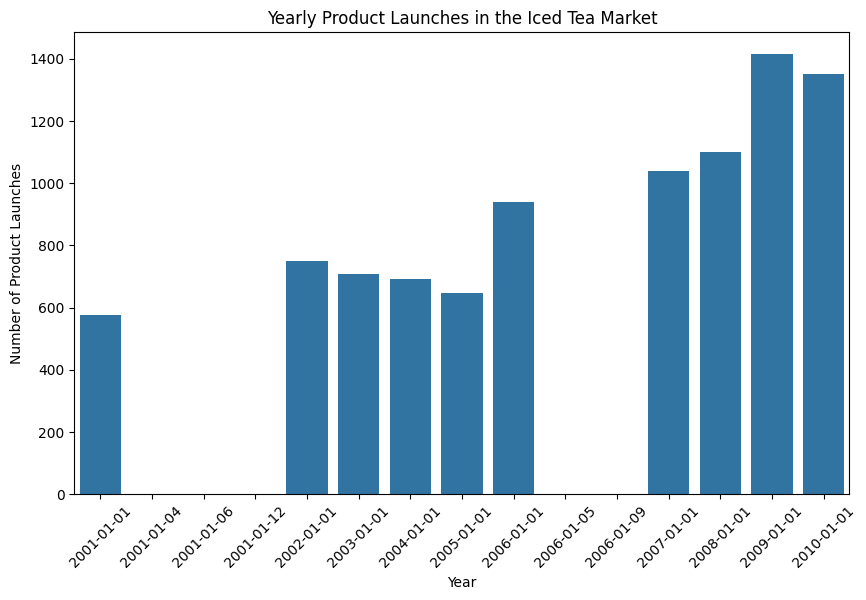

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yearly Product Launches Bar Chart
launch_year_counts = iced_tea_market_rows['Launch Date'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=launch_year_counts.index, y=launch_year_counts.values)
plt.title('Yearly Product Launches in the Iced Tea Market')
plt.xlabel('Year')
plt.ylabel('Number of Product Launches')
plt.xticks(rotation=45)
plt.show()


In [365]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Preparing the data for forecasting
# Assuming 'iced_tea_data' has a column 'Launch Year' with the year of each product launch
yearly_counts = iced_tea_market_rows['Launch Date'].value_counts().sort_index()
yearly_counts.index = pd.to_datetime(yearly_counts.index, format='%Y')

# Fitting the ARIMA model
model = ARIMA(yearly_counts, order=(5,1,0)) # Order here is an example and should be tuned
model_fit = model.fit()

# Forecasting the next 5 years
forecast = model_fit.forecast(steps=5)
forecast

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is

15     869.714951
16     352.846552
17     572.530630
18     762.006529
19    1022.393246
Name: predicted_mean, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16428\600798169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iced_tea_market_rows['Launch Date'] = pd.to_datetime(iced_tea_market_rows['Launch Date']).dt.year
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages

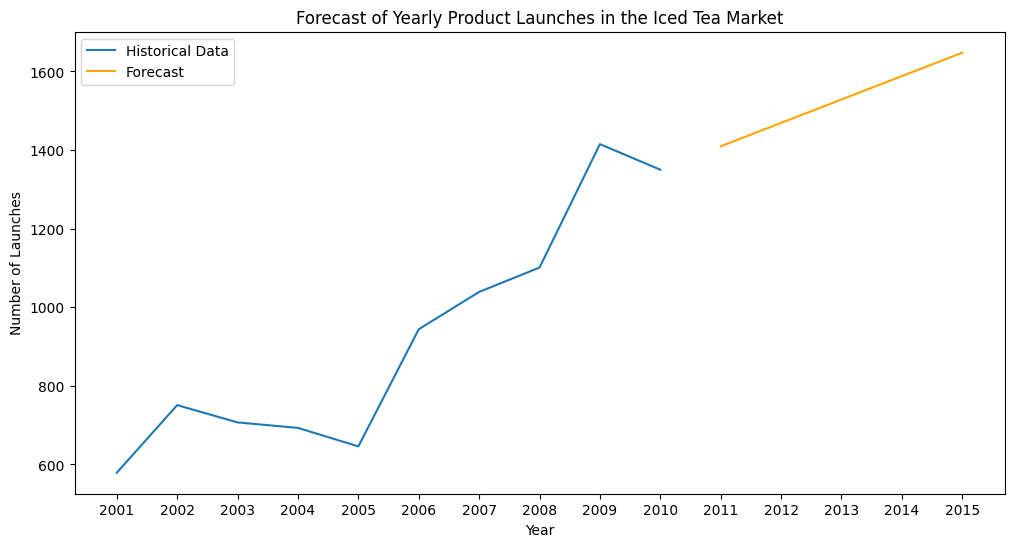

In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA


# Preparing the data for the ARIMA model
# Counting the number of launches each year and preparing the time series
iced_tea_market_rows['Launch Date'] = pd.to_datetime(iced_tea_market_rows['Launch Date']).dt.year
launch_counts_per_year = iced_tea_market_rows.groupby('Launch Date').size()

# Fitting an ARIMA model
# The order (p,d,q) of the ARIMA model is set to (1,1,1) as a starting point
model = ARIMA(launch_counts_per_year, order=(1, 1, 1))
model_fit = model.fit()

# Forecasting the next 5 years
forecast = model_fit.forecast(steps=5)
forecast_years = range(launch_counts_per_year.index.max() + 1, launch_counts_per_year.index.max() + 6)

# Plotting the historical data and the forecast
plt.figure(figsize=(12, 6))
sns.lineplot(x=launch_counts_per_year.index, y=launch_counts_per_year, label='Historical Data')
sns.lineplot(x=forecast_years, y=forecast, label='Forecast', color='orange')
plt.title('Forecast of Yearly Product Launches in the Iced Tea Market')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(list(launch_counts_per_year.index) + list(forecast_years))
plt.legend()
plt.show()